<a href="https://colab.research.google.com/github/rhshovon102/DataMining-MachineLearning/blob/main/Predicting_Women's_Diabetes_Disease_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Load Dataset**

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/8th Semester/DataMining&MachineLearning/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1




# **Preprocessing**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [77]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:8] = mms.fit_transform(df.iloc[:,0:8])

In [79]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


# **Visualization**

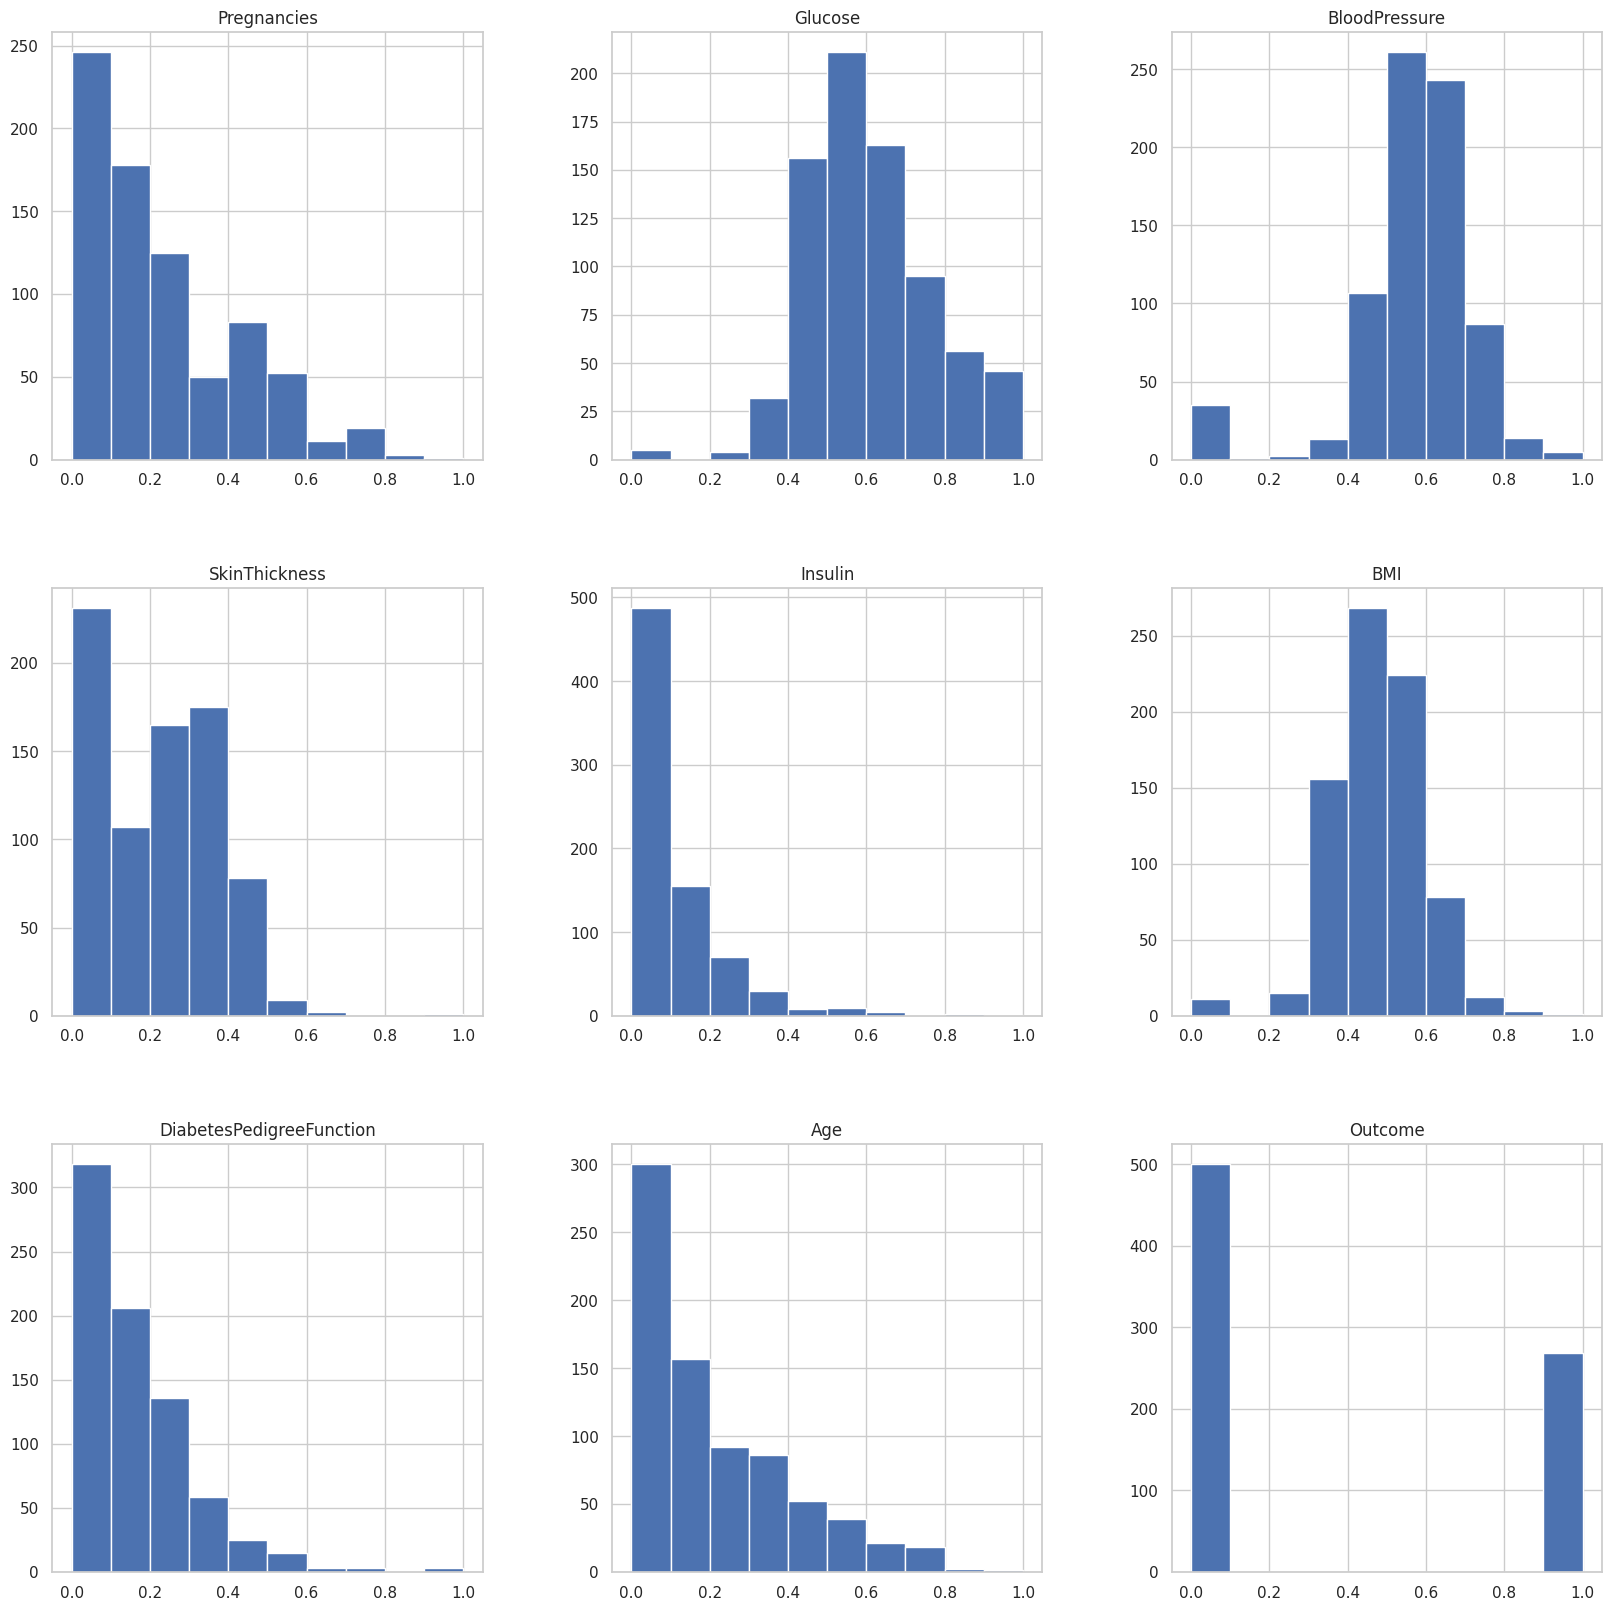

In [80]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt.show()

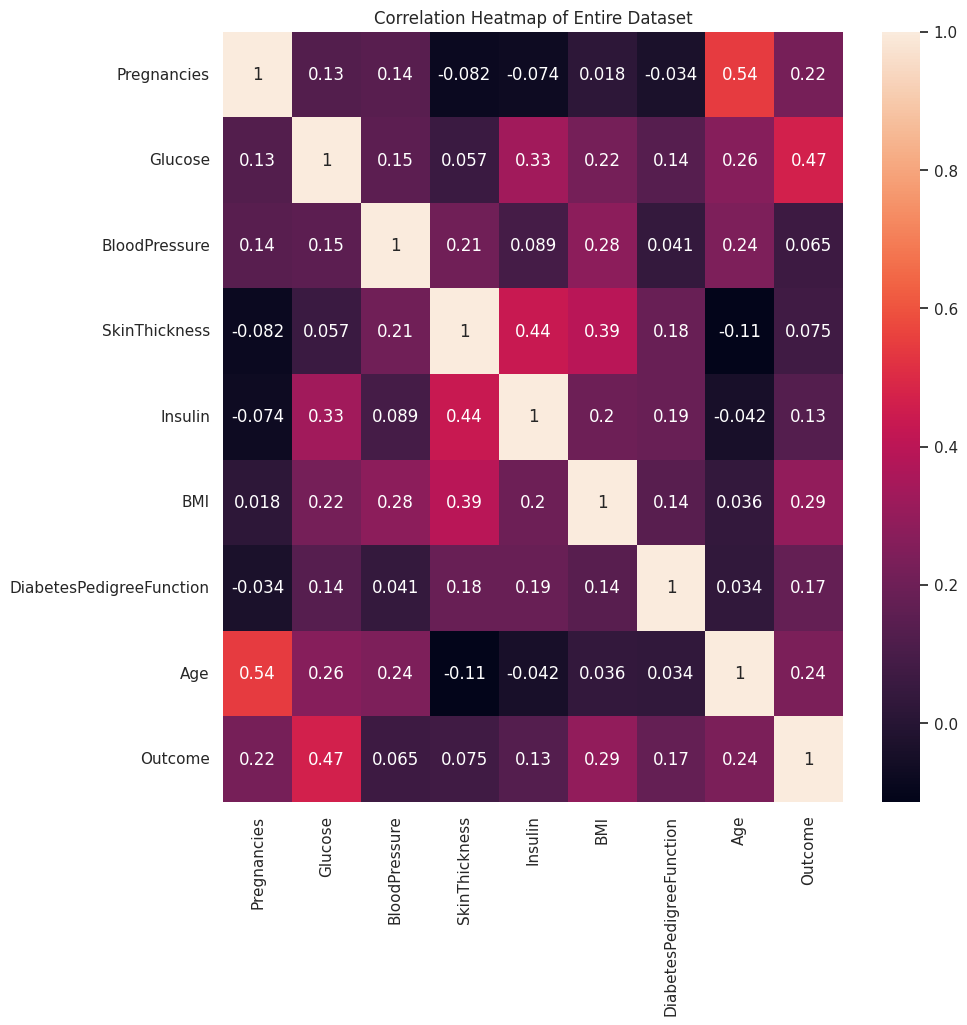

In [81]:
import seaborn as srn
plt.figure(figsize=(10, 10))
p = srn.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Entire Dataset")
plt.show()

**Detect and Remove Outliers**

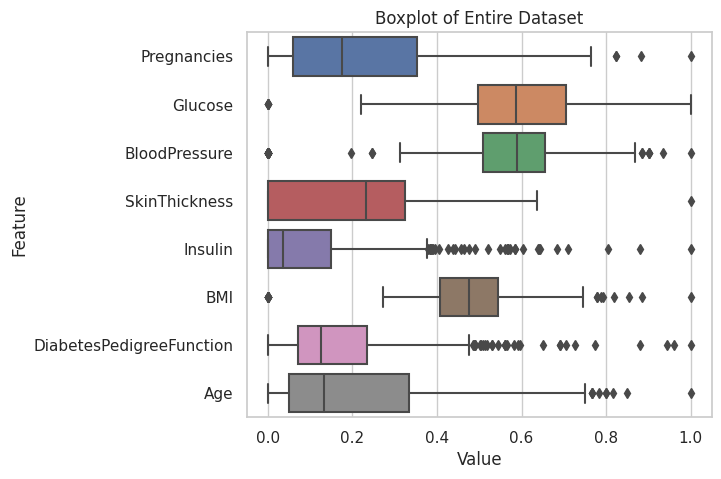

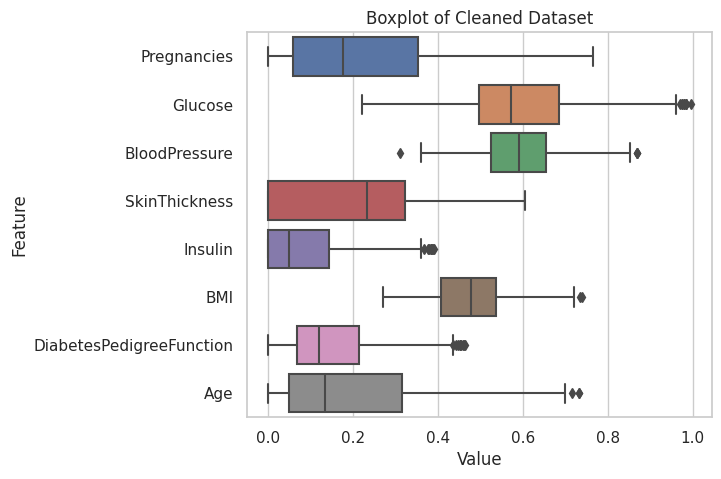

In [82]:
srn.set(style="whitegrid")
plt.figure(figsize=(6, 5))
data = df.iloc[:, 0:8]
srn.boxplot(data, orient="h")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot of Entire Dataset")
plt.show()

def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_remove_outliers = df.iloc[:,0:8]
df = remove_outliers(df, columns_to_remove_outliers)

plt.figure(figsize=(6, 5))
srn.boxplot(df.iloc[:,0:8], orient="h")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot of Cleaned Dataset")
plt.show()


In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df.iloc[:,0:8])

# **Several Model Implementation**

**Algorithm Evaluation Function**

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_algorithm(model, x, y):
    scores = cross_val_score(model, x, y, cv=5)
    print("Individual fold scores:", scores)

    mean_score = scores.mean()
    std_deviation = scores.std()
    print("Mean score:", mean_score)
    print("Standard Deviation:", std_deviation)

    predicted_labels = cross_val_predict(model, x, y, cv=5)

    conf_matrix = confusion_matrix(y, predicted_labels)

    plt.figure(figsize=(8, 6))
    srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Diabetic', 'Diabetic'],yticklabels=['Not Diabetic', 'Diabetic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    accuracy = accuracy_score(y, predicted_labels)
    precision = precision_score(y, predicted_labels)
    recall = recall_score(y, predicted_labels)
    f1 = f1_score(y, predicted_labels)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)



**LogisticRegression**

Individual fold scores: [0.7578125  0.74015748 0.76377953 0.76377953 0.79527559]
Mean score: 0.7641609251968504
Standard Deviation: 0.01780382653873119


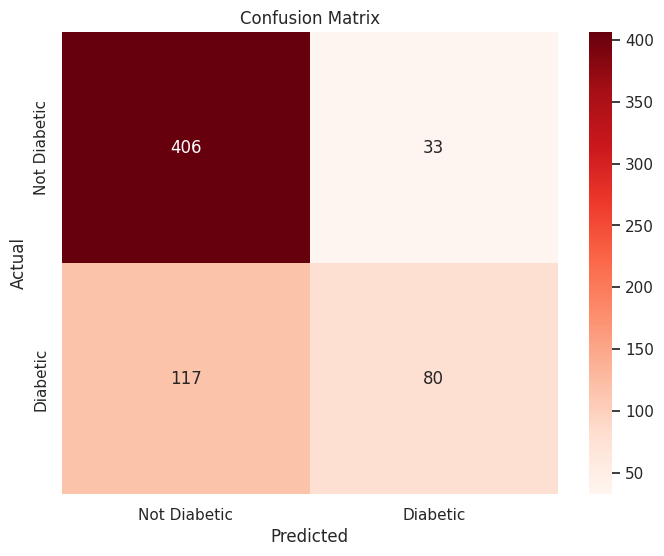

Accuracy: 0.7641509433962265
Precision: 0.7079646017699115
Recall: 0.40609137055837563
F1 Score: 0.5161290322580644


In [85]:
from sklearn.linear_model import LogisticRegression

x = principal_components
y = df.Outcome

lr = LogisticRegression()
evaluate_algorithm(lr, x, y)



**KNN**

Individual fold scores: [0.7421875  0.7007874  0.72440945 0.77165354 0.77952756]
Mean score: 0.7437130905511811
Standard Deviation: 0.029260614618218196


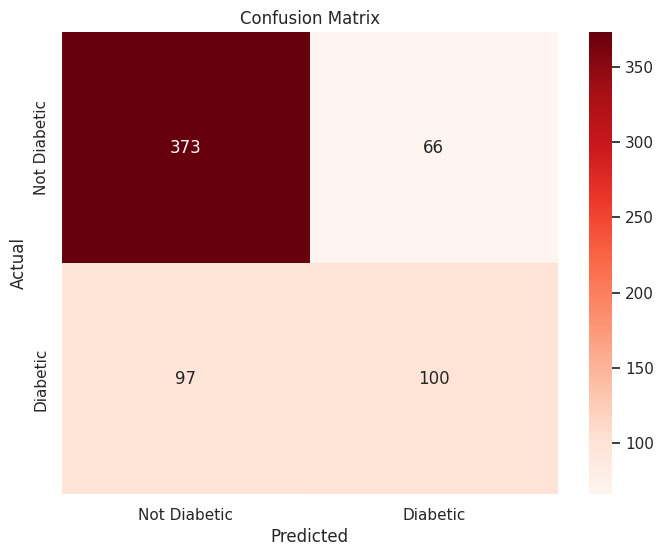

Accuracy: 0.7437106918238994
Precision: 0.6024096385542169
Recall: 0.5076142131979695
F1 Score: 0.5509641873278236


In [86]:
from sklearn.neighbors import KNeighborsClassifier

x = principal_components
y = df.Outcome

knn = KNeighborsClassifier(n_neighbors=3)
evaluate_algorithm(knn, x, y)


**NaiveBayes**

Individual fold scores: [0.765625   0.74015748 0.76377953 0.76377953 0.81889764]
Mean score: 0.7704478346456692
Standard Deviation: 0.025988772050782722


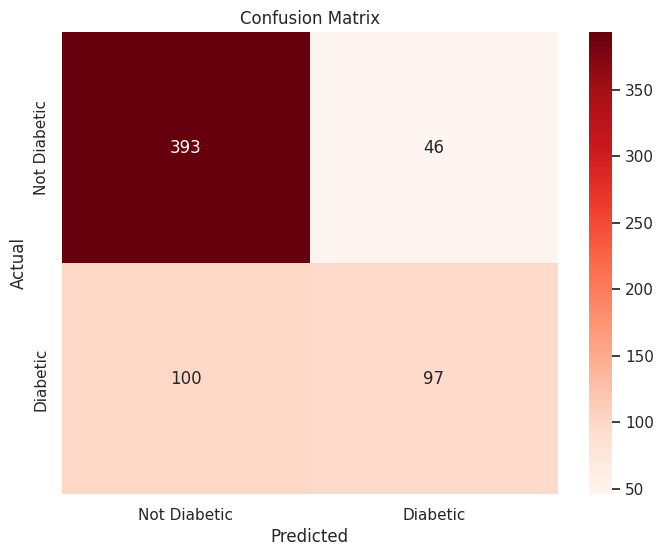

Accuracy: 0.7704402515723271
Precision: 0.6783216783216783
Recall: 0.49238578680203043
F1 Score: 0.5705882352941176


In [87]:
from sklearn.naive_bayes import GaussianNB

x = principal_components
y = df.Outcome

nb = GaussianNB()
evaluate_algorithm(nb, x, y)



**DecisionTree**

Individual fold scores: [0.6875     0.65354331 0.66929134 0.7480315  0.7007874 ]
Mean score: 0.6918307086614173
Standard Deviation: 0.03234641931623476


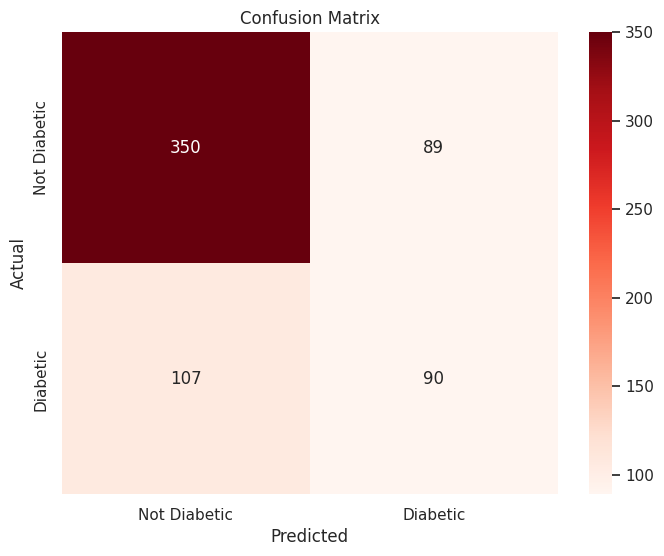

Accuracy: 0.6918238993710691
Precision: 0.5027932960893855
Recall: 0.45685279187817257
F1 Score: 0.4787234042553191


In [88]:
from sklearn.tree import DecisionTreeClassifier

x = principal_components
y = df.Outcome

dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
evaluate_algorithm(dt, x, y)

 **RandomForest**

Individual fold scores: [0.7578125  0.7007874  0.7480315  0.77952756 0.80314961]
Mean score: 0.7578617125984252
Standard Deviation: 0.0342768574299725


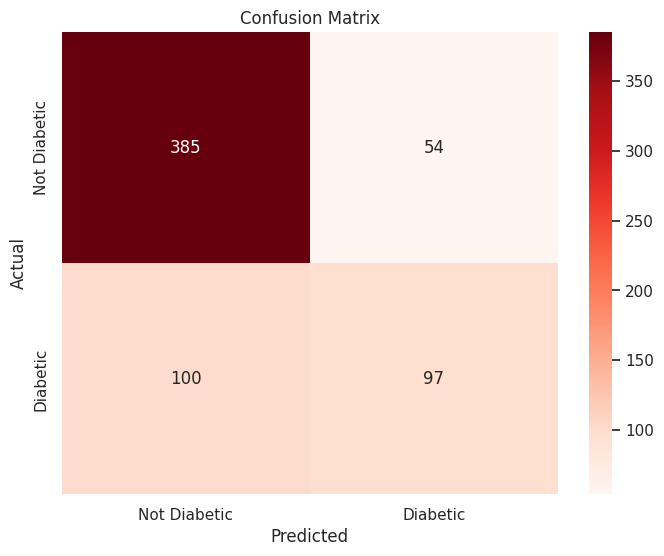

Accuracy: 0.7578616352201258
Precision: 0.6423841059602649
Recall: 0.49238578680203043
F1 Score: 0.557471264367816


In [89]:
from sklearn.ensemble import RandomForestClassifier

x = principal_components
y = df.Outcome

rf = RandomForestClassifier(n_estimators=100, random_state=0)

evaluate_algorithm(rf, x, y)

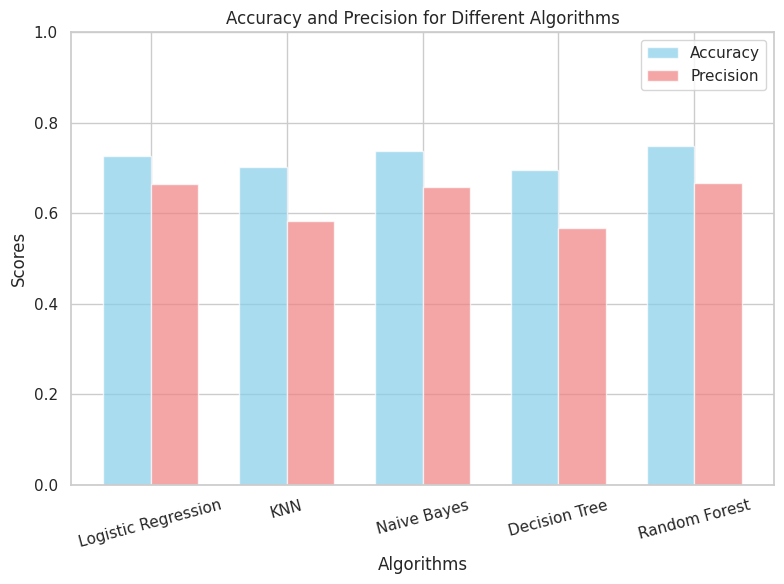

In [90]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
accuracy_values = [0.7265625, 0.703125, 0.7369791666666666, 0.6966145833333334, 0.7486979166666666]
precision_values = [0.6647727272727273, 0.5826446280991735, 0.6586538461538461, 0.5680933852140078, 0.6666666666666666]

bar_width = 0.35

indices = np.arange(len(algorithms))

plt.figure(figsize=(8, 6))
plt.bar(indices, accuracy_values, bar_width, label='Accuracy', color='skyblue', alpha=0.7)
plt.bar(indices + bar_width, precision_values, bar_width, label='Precision', color='lightcoral', alpha=0.7)

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Accuracy and Precision for Different Algorithms')
plt.xticks(indices + bar_width / 2, algorithms, rotation=15)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()
